# Logistic Regression Classification EXAMPLE

source: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

### 1- Load Dataset

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


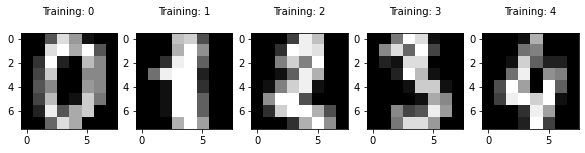

In [81]:
#showing the images in the dataset
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 10)

### 2- Split data in train/test

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### 3- Modeling Pattern

In [7]:
#Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression

#Step 2. Make an instance of the Model
logisticRegr = LogisticRegression()

#Step 3. Training the model on the data, storing the information learned from the data
logisticRegr.fit(x_train, y_train)

#Step 4. Predict labels for new data 
##One observation
logisticRegr.predict(x_test[0].reshape(1,-1))

##Multiple observations
logisticRegr.predict(x_test[0:10])

##Entire test set
predictions = logisticRegr.predict(x_test)

C:\Users\pacressa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4- Measuring model performance

In [8]:
#selecting Accuracy as the metric to use
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [20]:
#CONFUSION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


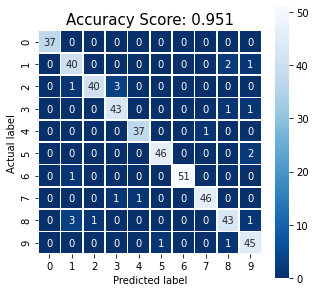

In [22]:
#seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score,3))
plt.title(all_sample_title, size = 15);

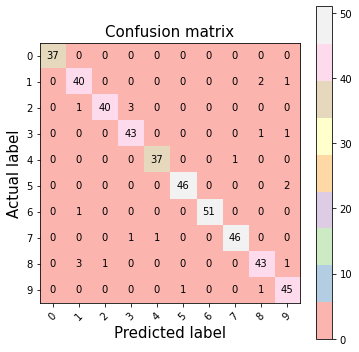

In [25]:
#matplotlib
plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

***
***
### 1- Load dataset

In [69]:
import pandas as pd
mnist = pd.read_csv(r'mnist.csv')
print(mnist_train.shape)

(60000, 785)


### 2- Splitting data into train/test and parameters/target

In [75]:
X = mnist_train.loc[:, mnist_train.columns != 'label']
y_train = mnist_train.label
X_test = mnist_test.loc[:, mnist_test.columns != 'label']
y_test = mnist_test.label

from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.loc[:, mnist.columns != 'label']
                                                            ,mnist.label, test_size=1/7.0, random_state=0)
print(train_img.shape)
print(test_img.shape)
print(train_lbl.shape)
print(test_lbl.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


#### Showing the images and labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

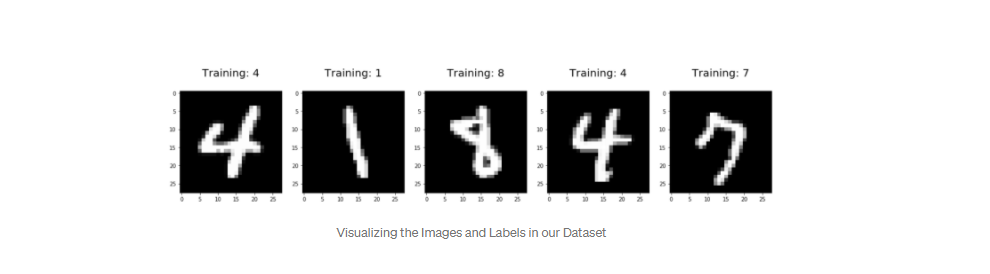

### 3- Modeling pattern

In [ ]:
#Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression

#Step 2. Make an instance of the Model
logisticRegr = LogisticRegression(solver = 'lbfgs')   #setting 'lbfgs' instead of default 'liblinear' to speed up model

#Step 3. Training the model on the data
logisticRegr.fit(train_img, train_lbl)

#Step 4. Predict the labels of new data
#1 observation
logisticRegr.predict(test_img[0].reshape(1,-1))

#multiple observations
logisticRegr.predict(test_img[0:10])

#entire dataset
predictions = logisticRegr.predict(test_img)

### 4- Measuring model performance

In [78]:
#accuracy
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


### 5- Display Misclassified images

In [ ]:
#Getting the misclassified images’ index
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1
    
#Showing the misclassified images and image labels using matplotlib
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title(‘Predicted: {}, Actual: {}’.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

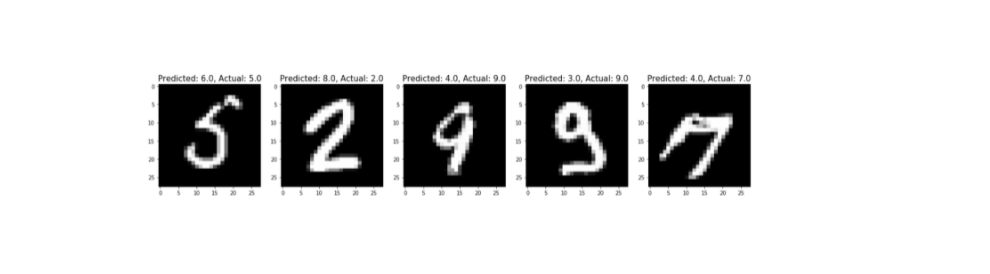